# Práctico clasificación de imágenes
En este práctico vamos a implementar un clasificador de imágenes. El objetivo sería diseñar y entrenar un algoritmo que en forma automática clasifique una imagen como correspondiente a una clase entre varias. Las clases las vamos a elegir nosotros (perros y gatos, autos y motos, o algo más interesante o útil).

## Dataset
1. El primer paso es elegir las clases entre las 
que vamos a desambiguar. Para este ejemplo yo elegí aviones y helicopteros. Pueden elegir más de 2 clases.
1. El segundo paso es buscar imágenes en internet en donde aparezcan los objetos que elegimos.
1. Las imágenes las vamos a guardar con la siguiente estructura de directorios:
- dataset
  - train
    - airplanes
      - imagen01.xxx
      - ...
      - imagenXX.xxx
    - helicopters
      - imagen01.xxx
      - ...
      - imagenXX.xxx
  - test
    - airplanes
      - imagen01.xxx
      - ...
      - imagenXX.xxx
    - helicopters
      - imagen01.xxx
      - ...
      - imagenXX.xxx

La cantidad de imágenes de entrenamiento debe ser aproximadamente del 80% y las de test del 20%. También hay que tratar de tener aproximadamente la misma cantidad de imágenes de cada clase (100 helicópteros y 100 aviones).
1. Después de esto comprimimos en un zip el dataset.



## Leer dataset desde colab
1. Subir dataset.zip a drive
1. Montamos nuestro drive
1. Nos pide que abramos un link y después que carguemos el código que nos devuelve. Cargamos el código y presionamos Enter.
1. Luego de eso descomprimimos el archivo.

In [1]:

from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!unzip "/content/drive/My Drive/dataset.zip"

Archive:  /content/drive/My Drive/dataset.zip
   creating: dataset/
   creating: dataset/train/
   creating: dataset/train/perros/
  inflating: dataset/train/perros/image.jpeg  
  inflating: dataset/train/perros/image1.jpeg  
  inflating: dataset/train/perros/image3.jpeg  
  inflating: dataset/train/perros/image4.jpeg  
  inflating: dataset/train/perros/image6.jpeg  
  inflating: dataset/train/perros/image7.jpeg  
  inflating: dataset/train/perros/image11.jpeg  
  inflating: dataset/train/perros/image12.jpeg  
  inflating: dataset/train/perros/image18.jpeg  
  inflating: dataset/train/perros/images.jpg  
  inflating: dataset/train/perros/images0.jpg  
  inflating: dataset/train/perros/images1.jpg  
  inflating: dataset/train/perros/images2.jpg  
  inflating: dataset/train/perros/images3.jpg  
  inflating: dataset/train/perros/images6.jpg  
  inflating: dataset/train/perros/images7.jpg  
  inflating: dataset/train/perros/images9.jpg  
  inflating: dataset/train/perros/images10.jpg  
  i

## Usar el dataset

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/dataset/train',
                                                 target_size=(64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


## Diseñar el modelo
Completar la celda siguiente con el código para construir el modelo.

In [4]:
from tensorflow.keras.datasets import mnist
mnist = tf.keras.datasets.mnist

print('Versión de TensorFlow:',tf.__version__)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ts = x_train.shape
x_train = x_train.reshape(ts[0], ts[1], ts[2], 1)
tt = x_test.shape
x_test = x_test.reshape(tt[0], tt[1], tt[2], 1)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(6, (6, 6), activation='relu',
                         input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(12, (5, 5), strides=(2, 2), activation='relu'),
  tf.keras.layers.Conv2D(24, (4, 4), strides=(2, 2), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(rate=.25),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(decay=.0001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
training_set = training_set.shuffle(buffer_size=1024).batch(64)
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_set = test_set.batch(64)

Versión de TensorFlow: 2.2.0
11493376/11490434 [==============================] - 0s 0us/step


# Entrenamos el modelo


In [5]:
model.fit(training_set, epochs = 25)


Epoch 1/25
938/938 [==============================] - 3s 3ms/step - loss: 0.2487 - accuracy: 0.9244
Epoch 2/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0899 - accuracy: 0.9724
Epoch 3/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0668 - accuracy: 0.9792
Epoch 4/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0535 - accuracy: 0.9831
Epoch 5/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0446 - accuracy: 0.9857
Epoch 6/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0384 - accuracy: 0.9877
Epoch 7/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0336 - accuracy: 0.9892
Epoch 8/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0297 - accuracy: 0.9901
Epoch 9/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0258 - accuracy: 0.9915
Epoch 10/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0248 - accuracy: 0.9920

## Evaluamos el modelo
Lograr al menos un 80% de exactitud en la clasificación.


In [6]:
model.evaluate(test_set)

157/157 [==============================] - 1s 3ms/step - loss: 0.0248 - accuracy: 0.9935


[0.024767175316810608, 0.9934999942779541]

## Probamos el modelo
1. Buscar 2 imágenes nuevas.
1. Mostrarlas en pantalla (matplotlib). 
1. Clasificarlas con nuestro modelo.
1. Mostrar el resultado de la clasificación.

Completar la siguiente celda con el código para realizar lo anterior.

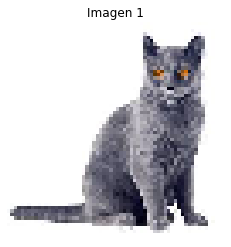

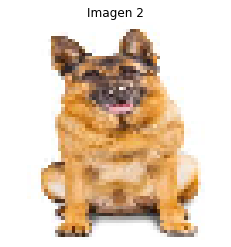

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/25
1/5 [=====>........................] - ETA: 2s - loss: 0.6858 - accuracy: 0.6250

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


5/5 [==============================] - 2s 301ms/step - loss: 0.7737 - accuracy: 0.5625 - val_loss: 0.6079 - val_accuracy: 0.5000
Epoch 2/25
5/5 [==============================] - 1s 279ms/step - loss: 0.7075 - accuracy: 0.5000 - val_loss: 0.6888 - val_accuracy: 0.4500
Epoch 3/25
5/5 [==============================] - 1s 274ms/step - loss: 0.6895 - accuracy: 0.6000 - val_loss: 0.6949 - val_accuracy: 0.6500
Epoch 4/25
5/5 [==============================] - 1s 280ms/step - loss: 0.6870 - accuracy: 0.5875 - val_loss: 0.6777 - val_accuracy: 0.5000
Epoch 5/25
5/5 [==============================] - 1s 275ms/step - loss: 0.6767 - accuracy: 0.6062 - val_loss: 0.6771 - val_accuracy: 0.6250
Epoch 6/25
5/5 [==============================] - 1s 272ms/step - loss: 0.6713 - accuracy: 0.5750 - val_loss: 0.6306 - val_accuracy: 0.6000
Epoch 7/25
5/5 [==============================] - 1s 270ms/step - loss: 0.6646 - accuracy: 0.6187 - val_loss: 0.7576 - val_accuracy: 0.5750
Epoch 8/25
5/5 [===============

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2

# Cargar dos imágenes nuevas
test_image1 = image.load_img('dataset/clasificar/gato.jpg', target_size = (64, 64))
test_image2 = image.load_img('dataset/clasificar/perro.jpg', target_size = (64, 64))

# Mostrar las dos imágenes en pantalla
plt1.imshow(test_image1)
plt1.title("Imagen 1")  
plt1.axis('off')
plt1.show()
plt2.imshow(test_image2)
plt2.title("Imagen 2")  
plt2.axis('off')
plt2.show()

# Iniciar CNN
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilar CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Adaptar CNN a las imágenes
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('dataset/train',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('dataset/test',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
classifier.fit_generator(training_set,
steps_per_epoch = None,
epochs = 25,
validation_data = test_set,
validation_steps = None)

# Clasificar las nuevas imágenes
test_image1 = image.img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1, axis = 0)
result1 = classifier.predict(test_image1)
training_set.class_indices
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis = 0)
result2 = classifier.predict(test_image2)
training_set.class_indices

# Mostrar los resultados de clasificación de las imágenes
print('Resultados de la clasificación:')
if result1[0][0] == 1: 
  prediction = 'perro'
else:
  prediction = 'gato'
print('La imagen 1 es un:',prediction) 

if result2[0][0] == 1: 
  prediction = 'perro'
else:
  prediction = 'gato'
print('La imagen 2 es un:',prediction) 